10 Minutes to pandas. Go through the short introduction of pandas for new users.

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
##############################################
#Object Creation: Series and DataFrame
#############################################

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])

In [5]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
dates = pd.date_range('20120101',periods=6)

In [7]:
dates

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))

In [9]:
df

A         B         C         D
2012-01-01 -0.141358  0.515122  0.535776 -0.102975
2012-01-02  0.960969 -0.996593 -1.328265  0.628583
2012-01-03  1.295228  0.247058 -0.311899 -1.085820
2012-01-04 -0.092972  0.906611  1.391475  0.212823
2012-01-05  1.494592 -0.061850 -0.192055  0.251388
2012-01-06 -0.147605 -0.218538  0.551034 -1.095484

In [10]:
# Creating DataFrame by passing a dict of objects that can be converted to series-like

In [11]:
df2 = pd.DataFrame({'A' : 1.,
                  'B' : pd.Timestamp('20130102'),
                  'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                  'D' : np.array([3]*4,dtype='int32'),
                  'E' : pd.Categorical(["test","train","test","train"]),
                  'F' : 'foo'})

In [12]:
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [13]:
# Having specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [14]:
# If you're using IPython, tab completion for column names (as well as public attributes) is automatically enabled.
# Here's a subset of the attributes that will be completed:

In [16]:
# df2.<TAB>

In [17]:
########################################################
#  Viewing Data
########################################################

In [18]:
df.head()

A         B         C         D
2012-01-01 -0.141358  0.515122  0.535776 -0.102975
2012-01-02  0.960969 -0.996593 -1.328265  0.628583
2012-01-03  1.295228  0.247058 -0.311899 -1.085820
2012-01-04 -0.092972  0.906611  1.391475  0.212823
2012-01-05  1.494592 -0.061850 -0.192055  0.251388

In [19]:
df.tail(3)

A         B         C         D
2012-01-04 -0.092972  0.906611  1.391475  0.212823
2012-01-05  1.494592 -0.061850 -0.192055  0.251388
2012-01-06 -0.147605 -0.218538  0.551034 -1.095484

In [20]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.values

array([[-0.14135825,  0.51512243,  0.53577578, -0.10297474],
       [ 0.96096949, -0.99659275, -1.32826543,  0.62858299],
       [ 1.29522782,  0.24705763, -0.3118985 , -1.08581984],
       [-0.09297225,  0.90661143,  1.39147465,  0.21282265],
       [ 1.4945917 , -0.06185005, -0.19205501,  0.2513883 ],
       [-0.14760456, -0.21853818,  0.55103385, -1.09548387]])

In [23]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.561476  0.065302  0.107678 -0.198581
std    0.773791  0.658411  0.933358  0.728930
min   -0.147605 -0.996593 -1.328265 -1.095484
25%   -0.129262 -0.179366 -0.281938 -0.840109
50%    0.433999  0.092604  0.171860  0.054924
75%    1.211663  0.448106  0.547219  0.241747
max    1.494592  0.906611  1.391475  0.628583

In [24]:
df.T

2012-01-01  2012-01-02  2012-01-03  2012-01-04  2012-01-05  2012-01-06
A   -0.141358    0.960969    1.295228   -0.092972    1.494592   -0.147605
B    0.515122   -0.996593    0.247058    0.906611   -0.061850   -0.218538
C    0.535776   -1.328265   -0.311899    1.391475   -0.192055    0.551034
D   -0.102975    0.628583   -1.085820    0.212823    0.251388   -1.095484

In [25]:
# Sorting by an axis
df.sort_index(axis=1, ascending=False)

D         C         B         A
2012-01-01 -0.102975  0.535776  0.515122 -0.141358
2012-01-02  0.628583 -1.328265 -0.996593  0.960969
2012-01-03 -1.085820 -0.311899  0.247058  1.295228
2012-01-04  0.212823  1.391475  0.906611 -0.092972
2012-01-05  0.251388 -0.192055 -0.061850  1.494592
2012-01-06 -1.095484  0.551034 -0.218538 -0.147605

In [26]:
df.sort_values(by='B')

A         B         C         D
2012-01-02  0.960969 -0.996593 -1.328265  0.628583
2012-01-06 -0.147605 -0.218538  0.551034 -1.095484
2012-01-05  1.494592 -0.061850 -0.192055  0.251388
2012-01-03  1.295228  0.247058 -0.311899 -1.085820
2012-01-01 -0.141358  0.515122  0.535776 -0.102975
2012-01-04 -0.092972  0.906611  1.391475  0.212823

In [27]:
#############################################
# Selection
#############################################

Note: While standard Python/Numpy expressions for selecting and setting are intuitive and come in handy for intetactive work, for production code, we recommend the optimized pandas access methods, .at, .iat, .loc, .iloc and .ix

In [39]:
# Selection by label

In [28]:
# Selecting a single column, which yield a Series, equivalent to df.A
df['A']

2012-01-01   -0.141358
2012-01-02    0.960969
2012-01-03    1.295228
2012-01-04   -0.092972
2012-01-05    1.494592
2012-01-06   -0.147605
Freq: D, Name: A, dtype: float64

In [29]:
# Selecting via [], which slices the rows.

In [30]:
df[0:3]

A         B         C         D
2012-01-01 -0.141358  0.515122  0.535776 -0.102975
2012-01-02  0.960969 -0.996593 -1.328265  0.628583
2012-01-03  1.295228  0.247058 -0.311899 -1.085820

In [32]:
df['20120102':'20120104']

A         B         C         D
2012-01-02  0.960969 -0.996593 -1.328265  0.628583
2012-01-03  1.295228  0.247058 -0.311899 -1.085820
2012-01-04 -0.092972  0.906611  1.391475  0.212823

In [33]:
# For geting a cross section using a label
df.loc[dates[0]] # get the row that corresponding the dates[0]

A   -0.141358
B    0.515122
C    0.535776
D   -0.102975
Name: 2012-01-01 00:00:00, dtype: float64

In [34]:
# Selecting on a multi-axis by label
df.loc[:,['A','B']]

A         B
2012-01-01 -0.141358  0.515122
2012-01-02  0.960969 -0.996593
2012-01-03  1.295228  0.247058
2012-01-04 -0.092972  0.906611
2012-01-05  1.494592 -0.061850
2012-01-06 -0.147605 -0.218538

In [35]:
# Showing label slicing, both endpoints are included
df.loc['20120102':'20120104',['A','B']]

A         B
2012-01-02  0.960969 -0.996593
2012-01-03  1.295228  0.247058
2012-01-04 -0.092972  0.906611

In [37]:
# Reduction in the dimensions of the returned object
df.loc['20120102',['A','B']]

A    0.960969
B   -0.996593
Name: 2012-01-02 00:00:00, dtype: float64

In [38]:
# For getting a scalar value
df.loc[dates[0],'A']

-0.14135824762594176

In [40]:
### Selection by Position

In [41]:
# Select via the position of the passed integers
df.iloc[3] # get the third row

A   -0.092972
B    0.906611
C    1.391475
D    0.212823
Name: 2012-01-04 00:00:00, dtype: float64

In [42]:
# By integer slices, acting similar to numpy/python
df.iloc[3:5,0:2]

A         B
2012-01-04 -0.092972  0.906611
2012-01-05  1.494592 -0.061850

In [43]:
df.iloc[[1,2,4],[0,2]]

A         C
2012-01-02  0.960969 -1.328265
2012-01-03  1.295228 -0.311899
2012-01-05  1.494592 -0.192055

In [44]:
df.iloc[1:3,:]

A         B         C         D
2012-01-02  0.960969 -0.996593 -1.328265  0.628583
2012-01-03  1.295228  0.247058 -0.311899 -1.085820

In [45]:
df.iloc[:,1:3]

B         C
2012-01-01  0.515122  0.535776
2012-01-02 -0.996593 -1.328265
2012-01-03  0.247058 -0.311899
2012-01-04  0.906611  1.391475
2012-01-05 -0.061850 -0.192055
2012-01-06 -0.218538  0.551034

In [46]:
df.iloc[1,1]

-0.99659275425908289

In [47]:
### Boolean Indexing

In [48]:
# Using a single column's value to select data
df[df.A > 0]

A         B         C         D
2012-01-02  0.960969 -0.996593 -1.328265  0.628583
2012-01-03  1.295228  0.247058 -0.311899 -1.085820
2012-01-05  1.494592 -0.061850 -0.192055  0.251388

In [50]:
# A where operation for getting
df[df > 0]

A         B         C         D
2012-01-01       NaN  0.515122  0.535776       NaN
2012-01-02  0.960969       NaN       NaN  0.628583
2012-01-03  1.295228  0.247058       NaN       NaN
2012-01-04       NaN  0.906611  1.391475  0.212823
2012-01-05  1.494592       NaN       NaN  0.251388
2012-01-06       NaN       NaN  0.551034       NaN

In [51]:
# Using the isin() method for filtering
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']
df2

A         B         C         D      E
2012-01-01 -0.141358  0.515122  0.535776 -0.102975    one
2012-01-02  0.960969 -0.996593 -1.328265  0.628583    one
2012-01-03  1.295228  0.247058 -0.311899 -1.085820    two
2012-01-04 -0.092972  0.906611  1.391475  0.212823  three
2012-01-05  1.494592 -0.061850 -0.192055  0.251388   four
2012-01-06 -0.147605 -0.218538  0.551034 -1.095484  three

In [53]:
df2[df2['E'].isin(['two','four'])]

A         B         C         D     E
2012-01-03  1.295228  0.247058 -0.311899 -1.085820   two
2012-01-05  1.494592 -0.061850 -0.192055  0.251388  four

In [54]:
df2[df2['E'].isin(['one'])]

A         B         C         D    E
2012-01-01 -0.141358  0.515122  0.535776 -0.102975  one
2012-01-02  0.960969 -0.996593 -1.328265  0.628583  one

In [55]:
### Setting 

In [58]:
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20120102',periods=6))
s1

2012-01-02    1
2012-01-03    2
2012-01-04    3
2012-01-05    4
2012-01-06    5
2012-01-07    6
Freq: D, dtype: int64

In [59]:
df['E'] = s1

In [60]:
df

A         B         C         D    E
2012-01-01 -0.141358  0.515122  0.535776 -0.102975  NaN
2012-01-02  0.960969 -0.996593 -1.328265  0.628583  1.0
2012-01-03  1.295228  0.247058 -0.311899 -1.085820  2.0
2012-01-04 -0.092972  0.906611  1.391475  0.212823  3.0
2012-01-05  1.494592 -0.061850 -0.192055  0.251388  4.0
2012-01-06 -0.147605 -0.218538  0.551034 -1.095484  5.0

In [61]:
## Setting values by label
df.at[dates[0],'A'] = 0

In [62]:
## Setting values by position
df.iat[0,1] = 0

In [63]:
## Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5]*len(df))

In [64]:
## The result of the prior setting operations
df

A         B         C  D    E
2012-01-01  0.000000  0.000000  0.535776  5  NaN
2012-01-02  0.960969 -0.996593 -1.328265  5  1.0
2012-01-03  1.295228  0.247058 -0.311899  5  2.0
2012-01-04 -0.092972  0.906611  1.391475  5  3.0
2012-01-05  1.494592 -0.061850 -0.192055  5  4.0
2012-01-06 -0.147605 -0.218538  0.551034  5  5.0

In [65]:
# A where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

A         B         C  D    E
2012-01-01  0.000000  0.000000 -0.535776 -5  NaN
2012-01-02 -0.960969 -0.996593 -1.328265 -5 -1.0
2012-01-03 -1.295228 -0.247058 -0.311899 -5 -2.0
2012-01-04 -0.092972 -0.906611 -1.391475 -5 -3.0
2012-01-05 -1.494592 -0.061850 -0.192055 -5 -4.0
2012-01-06 -0.147605 -0.218538 -0.551034 -5 -5.0

In [66]:
########################################
### Missing Data
########################################

In [67]:
# pandas primarily uses the value np.nan to represent missing data. 
# It is by default not included in computations.
# See the Missing Data Section of pandas's website.

In [75]:
# Reindexing allows you to change/add/delete the index on a specified axis.
# This returns a copy of the data
df1 = df.reindex( index=dates[0:4], columns=(df.columns) | ['F'])
df1.loc[dates[0]:dates[1],'F'] = 1
df1

A         B         C  D    E    F
2012-01-01  0.000000  0.000000  0.535776  5  NaN  1.0
2012-01-02  0.960969 -0.996593 -1.328265  5  1.0  1.0
2012-01-03  1.295228  0.247058 -0.311899  5  2.0  NaN
2012-01-04 -0.092972  0.906611  1.391475  5  3.0  NaN

In [76]:
# to drop any rows that have missing data
df1.dropna(how='any')

A         B         C  D    E    F
2012-01-02  0.960969 -0.996593 -1.328265  5  1.0  1.0

In [77]:
# Filling missing data
df1.fillna(value=5)

A         B         C  D    E    F
2012-01-01  0.000000  0.000000  0.535776  5  5.0  1.0
2012-01-02  0.960969 -0.996593 -1.328265  5  1.0  1.0
2012-01-03  1.295228  0.247058 -0.311899  5  2.0  5.0
2012-01-04 -0.092972  0.906611  1.391475  5  3.0  5.0

In [78]:
# To get the boolean mask where values are nan
pd.isnull(df1)

A      B      C      D      E      F
2012-01-01  False  False  False  False   True  False
2012-01-02  False  False  False  False  False  False
2012-01-03  False  False  False  False  False   True
2012-01-04  False  False  False  False  False   True

In [79]:
############################################
## Operation
############################################

In [80]:
### Stats

In [81]:
# Operations in general exclude missing data
# Performing a descriptive statistic
df

A         B         C  D    E
2012-01-01  0.000000  0.000000  0.535776  5  NaN
2012-01-02  0.960969 -0.996593 -1.328265  5  1.0
2012-01-03  1.295228  0.247058 -0.311899  5  2.0
2012-01-04 -0.092972  0.906611  1.391475  5  3.0
2012-01-05  1.494592 -0.061850 -0.192055  5  4.0
2012-01-06 -0.147605 -0.218538  0.551034  5  5.0

In [82]:
df.mean()

A    0.585035
B   -0.020552
C    0.107678
D    5.000000
E    3.000000
dtype: float64

In [83]:
# Same operation on the other axis
df.mean(1)

2012-01-01    1.383944
2012-01-02    0.927222
2012-01-03    1.646077
2012-01-04    2.041023
2012-01-05    2.048137
2012-01-06    2.036978
Freq: D, dtype: float64

In [84]:
# Operating whith objects that have different dimensionality and need aligment.
# In addition, pandas automatically broadcasts along the specified dimension.


In [99]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)

In [100]:
s

2012-01-01    NaN
2012-01-02    NaN
2012-01-03    1.0
2012-01-04    3.0
2012-01-05    5.0
2012-01-06    NaN
Freq: D, dtype: float64

In [101]:
df.sub(s,axis='index')

A         B         C    D    E
2012-01-01       NaN       NaN       NaN  NaN  NaN
2012-01-02       NaN       NaN       NaN  NaN  NaN
2012-01-03  0.295228 -0.752942 -1.311899  4.0  1.0
2012-01-04 -3.092972 -2.093389 -1.608525  2.0  0.0
2012-01-05 -3.505408 -5.061850 -5.192055  0.0 -1.0
2012-01-06       NaN       NaN       NaN  NaN  NaN

In [102]:
### Apply

In [103]:
## Applying function to the data
df

A         B         C  D    E
2012-01-01  0.000000  0.000000  0.535776  5  NaN
2012-01-02  0.960969 -0.996593 -1.328265  5  1.0
2012-01-03  1.295228  0.247058 -0.311899  5  2.0
2012-01-04 -0.092972  0.906611  1.391475  5  3.0
2012-01-05  1.494592 -0.061850 -0.192055  5  4.0
2012-01-06 -0.147605 -0.218538  0.551034  5  5.0

In [104]:
df.apply(np.cumsum)

A         B         C   D     E
2012-01-01  0.000000  0.000000  0.535776   5   NaN
2012-01-02  0.960969 -0.996593 -0.792490  10   1.0
2012-01-03  2.256197 -0.749535 -1.104388  15   3.0
2012-01-04  2.163225  0.157076  0.287086  20   6.0
2012-01-05  3.657817  0.095226  0.095031  25  10.0
2012-01-06  3.510212 -0.123312  0.646065  30  15.0

In [106]:
df.apply(lambda x: x.max() - x.min()) # x indicate each row of df by defaut

A    1.642196
B    1.903204
C    2.719740
D    0.000000
E    4.000000
dtype: float64

In [107]:
## Histogramming

In [108]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    5
1    4
2    1
3    4
4    2
5    0
6    5
7    3
8    6
9    3
dtype: int64

In [109]:
s.value_counts()

5    2
4    2
3    2
6    1
2    1
1    1
0    1
dtype: int64

In [110]:
## String Methods

Series is equipped with a set of string processing methods in the 'str' attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in 'str' generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [111]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [112]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [113]:
################################################
###  Merge
################################################

In [114]:
## Concat

Pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.
See the Merging section

In [115]:
# Concatenating pandas objects together with concat()
df = pd.DataFrame(np.random.randn(10,4))
df

0         1         2         3
0 -0.232497  0.414056 -0.956625  0.172314
1  0.021775 -1.091190 -0.303424 -1.391095
2  0.262042  0.120217 -0.153599  2.354800
3 -0.042133  1.147307 -1.154657 -2.629318
4 -0.025494  0.103904  0.851035 -0.185440
5 -0.142785 -0.042485 -0.015978 -1.172049
6 -0.778407  0.874380  0.614095  1.614016
7 -0.957620 -1.617743 -0.450405 -0.433573
8 -0.732191 -0.549562  0.535162  0.489395
9 -1.033884 -0.546205 -0.294216 -0.395757

In [120]:
# break it into pieces
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.232497  0.414056 -0.956625  0.172314
 1  0.021775 -1.091190 -0.303424 -1.391095
 2  0.262042  0.120217 -0.153599  2.354800,
           0         1         2         3
 3 -0.042133  1.147307 -1.154657 -2.629318
 4 -0.025494  0.103904  0.851035 -0.185440
 5 -0.142785 -0.042485 -0.015978 -1.172049
 6 -0.778407  0.874380  0.614095  1.614016,
           0         1         2         3
 7 -0.957620 -1.617743 -0.450405 -0.433573
 8 -0.732191 -0.549562  0.535162  0.489395
 9 -1.033884 -0.546205 -0.294216 -0.395757]

In [121]:
pd.concat(pieces)

0         1         2         3
0 -0.232497  0.414056 -0.956625  0.172314
1  0.021775 -1.091190 -0.303424 -1.391095
2  0.262042  0.120217 -0.153599  2.354800
3 -0.042133  1.147307 -1.154657 -2.629318
4 -0.025494  0.103904  0.851035 -0.185440
5 -0.142785 -0.042485 -0.015978 -1.172049
6 -0.778407  0.874380  0.614095  1.614016
7 -0.957620 -1.617743 -0.450405 -0.433573
8 -0.732191 -0.549562  0.535162  0.489395
9 -1.033884 -0.546205 -0.294216 -0.395757

In [124]:
## Join
# SQL style merges. See the Database style joining

In [125]:
left = pd.DataFrame({
        'key' : ['foo','foo'],
        'lval': [1,2]
    })
left

key  lval
0  foo     1
1  foo     2

In [126]:
right = pd.DataFrame({
        'key' : ['foo','foo'],
        'rval': [4,5]
    })
right

key  rval
0  foo     4
1  foo     5

In [127]:
pd.merge(left,right,on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

In [128]:
###  Append
# Append rows to a DataFrame. See the Appending section

In [129]:
df = pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df

A         B         C         D
0 -1.369915 -1.930554 -0.130017 -0.488412
1  0.884762 -0.738478 -1.491449  0.222696
2  0.950910  1.049367 -0.987850 -1.814065
3  0.829573  1.504485  1.532989  0.694654
4 -0.752002 -0.859496  0.139550 -0.829831
5 -1.253918  0.564493  0.473954 -0.084973
6  0.868182  0.490297  0.671699 -0.034065
7 -0.370738  0.976783  0.363466 -0.245434

In [133]:
s = df.iloc[3]
s

A    0.829573
B    1.504485
C    1.532989
D    0.694654
Name: 3, dtype: float64

In [134]:
df.append(s,ignore_index=True)

A         B         C         D
0 -1.369915 -1.930554 -0.130017 -0.488412
1  0.884762 -0.738478 -1.491449  0.222696
2  0.950910  1.049367 -0.987850 -1.814065
3  0.829573  1.504485  1.532989  0.694654
4 -0.752002 -0.859496  0.139550 -0.829831
5 -1.253918  0.564493  0.473954 -0.084973
6  0.868182  0.490297  0.671699 -0.034065
7 -0.370738  0.976783  0.363466 -0.245434
8  0.829573  1.504485  1.532989  0.694654

In [135]:
## Grouping

In [136]:
# By "group by" we are referring to a process involving one or more of the following steps
#    Splitting : the data into groups based on some criteria
#    Applying : a function to each group independently
#    Combining : the results into a data structure
# Seed the Grouping section

In [137]:
df = pd.DataFrame({
        'A' : ['foo','bar','foo','bar','foo','bar','foo','foo'],
        'B' : ['one','one','two','three','two','two','one','three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

A      B         C         D
0  foo    one  1.045439 -0.356303
1  bar    one -0.219672  0.579529
2  foo    two  0.389218 -1.076520
3  bar  three -0.190011 -2.504312
4  foo    two  0.638625  0.661820
5  bar    two  0.032324  1.084815
6  foo    one -0.548152 -0.110945
7  foo  three -0.031050  1.237791

In [139]:
# Grouping and then applying a function 'sum' to the resulting groups.
df.groupby('A').sum()

C         D
A                      
bar -0.377359 -0.839968
foo  1.494079  0.355843

In [140]:
# Grouping by multiple columns forms a hierarchical index, which we then apply the function.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.219672  0.579529
    three -0.190011 -2.504312
    two    0.032324  1.084815
foo one    0.497287 -0.467248
    three -0.031050  1.237791
    two    1.027842 -0.414700

In [141]:
##########################################
##  Reshaping
##########################################

In [142]:
## Stack

In [143]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']
                   ]
                 )
             )
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [145]:
index = pd.MultiIndex.from_tuples(tuples,names=['first','second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [146]:
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df

A         B
first second                    
bar   one    -0.702314  0.079016
      two     0.788846 -1.924155
baz   one     1.408150  0.536361
      two    -0.129283 -0.162053
foo   one    -0.977202 -0.528426
      two     0.083542  1.324479
qux   one    -0.315522 -0.285444
      two    -0.638460 -0.199015

In [147]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.702314  0.079016
      two     0.788846 -1.924155
baz   one     1.408150  0.536361
      two    -0.129283 -0.162053

In [148]:
# The stack() method "compresses" a level in the DataFrame's columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.702314
               B    0.079016
       two     A    0.788846
               B   -1.924155
baz    one     A    1.408150
               B    0.536361
       two     A   -0.129283
               B   -0.162053
dtype: float64

In [149]:
# With a "stacked" DataFrame or Series (having a 'MultiIndex' as the 'index'), the inverse operation of stack()
# is unstack(), which by default unstacks the last level:

In [150]:
stacked.unstack()

A         B
first second                    
bar   one    -0.702314  0.079016
      two     0.788846 -1.924155
baz   one     1.408150  0.536361
      two    -0.129283 -0.162053

In [151]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.702314  0.788846
      B  0.079016 -1.924155
baz   A  1.408150 -0.129283
      B  0.536361 -0.162053

In [152]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.702314  1.408150
       B  0.079016  0.536361
two    A  0.788846 -0.129283
       B -1.924155 -0.162053

In [153]:
### Pivot Tables

In [154]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)
                  }
                 )
df

A  B    C         D         E
0     one  A  foo -0.750736 -0.350743
1     one  B  foo -1.086549  0.148726
2     two  C  foo  0.402469 -1.865618
3   three  A  bar -2.281126 -0.234904
4     one  B  bar  1.675779 -0.233023
5     one  C  bar -0.046433  0.524501
6     two  A  foo  0.311987  0.066947
7   three  B  foo  1.161856  0.917653
8     one  C  foo -0.634162  0.406354
9     one  A  bar -0.233298 -0.142774
10    two  B  bar  0.126542  0.020274
11  three  C  bar  0.346531 -0.072056

In [155]:
# we can produce pivot tables from this data very easily
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])

C             bar       foo
A     B                    
one   A -0.233298 -0.750736
      B  1.675779 -1.086549
      C -0.046433 -0.634162
three A -2.281126       NaN
      B       NaN  1.161856
      C  0.346531       NaN
two   A       NaN  0.311987
      B  0.126542       NaN
      C       NaN  0.402469

In [156]:
############################################
##  Time Series
############################################

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial application. See the Time Series section

In [165]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    23131
Freq: 5T, dtype: int64

In [166]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts = pd.Series(np.random.randn(len(rng)),rng)
ts

2012-03-06   -0.686069
2012-03-07    0.692904
2012-03-08   -0.138682
2012-03-09   -0.636419
2012-03-10   -0.828446
Freq: D, dtype: float64

In [167]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.686069
2012-03-07 00:00:00+00:00    0.692904
2012-03-08 00:00:00+00:00   -0.138682
2012-03-09 00:00:00+00:00   -0.636419
2012-03-10 00:00:00+00:00   -0.828446
Freq: D, dtype: float64

In [168]:
# Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.686069
2012-03-06 19:00:00-05:00    0.692904
2012-03-07 19:00:00-05:00   -0.138682
2012-03-08 19:00:00-05:00   -0.636419
2012-03-09 19:00:00-05:00   -0.828446
Freq: D, dtype: float64

In [169]:
# Converting between time span representations
rng = pd.date_range('1/1/2012',periods=5,freq='M')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-01-31   -0.159359
2012-02-29    1.004522
2012-03-31    1.096413
2012-04-30   -0.273701
2012-05-31    1.230837
Freq: M, dtype: float64

In [170]:
ps = ts.to_period()
ps

2012-01   -0.159359
2012-02    1.004522
2012-03    1.096413
2012-04   -0.273701
2012-05    1.230837
Freq: M, dtype: float64

In [171]:
ps.to_timestamp()

2012-01-01   -0.159359
2012-02-01    1.004522
2012-03-01    1.096413
2012-04-01   -0.273701
2012-05-01    1.230837
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [172]:
prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index = (prng.asfreq('M','e')+1).asfreq('H','s') + 9
ts.head()

1990-03-01 09:00   -0.645962
1990-06-01 09:00    0.619704
1990-09-01 09:00   -0.724854
1990-12-01 09:00    0.141827
1991-03-01 09:00    0.685143
Freq: H, dtype: float64

In [173]:
############################
##  Categoricals
############################

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [174]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], 
                   "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

In [175]:
# Convert the raw grades to a categorical data type
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [176]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)
df['grade'].cat.categories = ["very good","good","very bad"]

In [177]:
# Reorder the categories and simultaneously add the missing categories 
# (methods under Series.cat return a new Series per default).
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [178]:
# Sorting is per order in the categories, not lexical order
df.sort_values(by='grade')

id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

In [179]:
# Grouping by a categorical column shows also empty categories
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [180]:
###########################################
### Plotting
###########################################

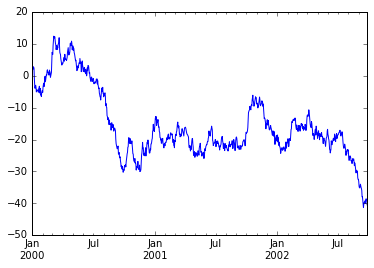

In [181]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
ts = ts.cumsum()
ts.plot()

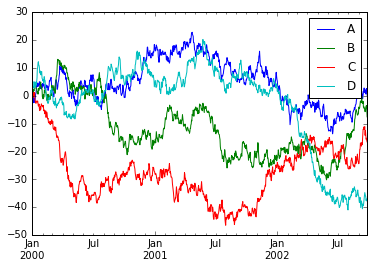

In [182]:
# On DataFrame, plot() is a convenient to plot all of the columns with labels
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index, columns=['A','B','C','D'])
df = df.cumsum()
df.plot()
plt.legend(loc='best')

In [183]:
#####################################
## Getting Data in/out
#####################################

In [184]:
## writing to a csv file
df.to_csv('foo.csv')

In [185]:
## reading from a file
pd.read_csv('foo.csv')

Unnamed: 0         A         B          C          D
0    2000-01-01  0.098817  2.305352   0.270887   1.423471
1    2000-01-02 -0.480833  2.129300   0.621147   3.165075
2    2000-01-03 -1.404513  0.890247   0.327342   2.740807
3    2000-01-04 -2.518958  1.823944  -0.546545   2.955649
4    2000-01-05 -0.625780  2.164705   0.746331   3.499537
5    2000-01-06 -0.876374  1.780947   1.210091   5.035776
6    2000-01-07 -1.756844  2.884119   0.208020   4.620355
7    2000-01-08 -2.392301  3.513107   1.004574   2.860863
8    2000-01-09 -1.727280  3.807121  -1.614120   3.576263
9    2000-01-10 -0.527086  4.050077  -2.116075   3.622012
10   2000-01-11  0.683771  4.119279  -2.539930   3.465227
11   2000-01-12  0.949345  2.550090  -2.745329   4.953753
12   2000-01-13  2.421445  2.550682  -1.961531   3.883759
13   2000-01-14  3.873397  2.322105  -1.987903   4.987144
14   2000-01-15  4.382682  1.139541  -1.908379   6.340523
15   2000-01-16  4.589234  0.831531  -2.239652   9.491217
16   2000-01-17  3.335773  1.488761  -1.928503  10.221421
17   2000-01-18  4.332471  0.553149  -2.897829  11.699657
18   2000-01-19  3.436547  2.665631  -3.735106  12.170631
19   2000-01-20  3.751851  1.820717  -3.565369  11.036064
20   2000-01-21  3.967999  1.947277  -3.000961  10.854399
21   2000-01-22  5.002731  2.372307  -4.601253  10.170890
22   2000-01-23  4.594612  3.170312  -5.336967   8.170947
23   2000-01-24  3.336540  3.552973  -5.287811   8.159571
24   2000-01-25  2.533724  4.250501  -3.907331   8.844117
25   2000-01-26  2.891746  4.940185  -4.916325   7.755725
26   2000-01-27  3.129736  3.928233  -3.678552   7.458741
27   2000-01-28  3.966941  2.440060  -2.927902   8.302793
28   2000-01-29  3.273264  3.078442  -3.636475   8.644432
29   2000-01-30  2.904254  2.264361  -3.456801   6.255575
..          ...       ...       ...        ...        ...
970  2002-08-28  1.674102 -6.952710 -20.929679 -34.489970
971  2002-08-29  1.345452 -6.898870 -22.668541 -33.795618
972  2002-08-30  3.338471 -6.590817 -23.555901 -34.900551
973  2002-08-31  3.133490 -6.506287 -23.879972 -35.633614
974  2002-09-01  2.970229 -4.075120 -24.395952 -36.065030
975  2002-09-02  4.328385 -4.520318 -24.078822 -37.582159
976  2002-09-03  3.219793 -4.705502 -21.776633 -38.295547
977  2002-09-04  2.448737 -4.098825 -19.245157 -36.893523
978  2002-09-05  1.827955 -2.796067 -19.204249 -36.461999
979  2002-09-06  1.848812 -1.889275 -16.919463 -38.281210
980  2002-09-07  1.789174 -2.233312 -17.323968 -40.098125
981  2002-09-08  0.670435 -2.476444 -17.229019 -38.806803
982  2002-09-09  1.055703 -1.933833 -18.070405 -37.713873
983  2002-09-10  1.555601 -0.206930 -16.848263 -38.567420
984  2002-09-11  0.568979 -2.547869 -17.588280 -38.645241
985  2002-09-12 -0.995608 -2.280879 -16.295165 -40.544852
986  2002-09-13 -0.998851 -2.780510 -14.403937 -39.319937
987  2002-09-14  0.420891 -2.026910 -12.051724 -39.066207
988  2002-09-15  1.194598 -4.068448 -12.111342 -39.302314
989  2002-09-16  2.471468 -3.854889 -11.214341 -38.158781
990  2002-09-17  2.765054 -4.591974 -12.038521 -36.689682
991  2002-09-18  2.576530 -4.418285 -11.613191 -35.562783
992  2002-09-19  1.168537 -5.384883 -11.094608 -34.710703
993  2002-09-20  2.088472 -5.742934 -14.210351 -35.356820
994  2002-09-21  1.005141 -5.211630 -12.553930 -35.932117
995  2002-09-22  0.609197 -4.166347 -14.169090 -36.214816
996  2002-09-23  2.087725 -3.690809 -15.629518 -37.578619
997  2002-09-24  2.589482 -3.526369 -15.234270 -37.034482
998  2002-09-25  2.184814 -5.128838 -16.122019 -37.657958
999  2002-09-26  0.170310 -7.585545 -16.568754 -37.806729

[1000 rows x 5 columns]

In [188]:
# HDF5
df.to_hdf('foo.h5','df')

In [189]:
pd.read_hdf('foo.h5','df')

A         B          C          D
2000-01-01  0.098817  2.305352   0.270887   1.423471
2000-01-02 -0.480833  2.129300   0.621147   3.165075
2000-01-03 -1.404513  0.890247   0.327342   2.740807
2000-01-04 -2.518958  1.823944  -0.546545   2.955649
2000-01-05 -0.625780  2.164705   0.746331   3.499537
2000-01-06 -0.876374  1.780947   1.210091   5.035776
2000-01-07 -1.756844  2.884119   0.208020   4.620355
2000-01-08 -2.392301  3.513107   1.004574   2.860863
2000-01-09 -1.727280  3.807121  -1.614120   3.576263
2000-01-10 -0.527086  4.050077  -2.116075   3.622012
2000-01-11  0.683771  4.119279  -2.539930   3.465227
2000-01-12  0.949345  2.550090  -2.745329   4.953753
2000-01-13  2.421445  2.550682  -1.961531   3.883759
2000-01-14  3.873397  2.322105  -1.987903   4.987144
2000-01-15  4.382682  1.139541  -1.908379   6.340523
2000-01-16  4.589234  0.831531  -2.239652   9.491217
2000-01-17  3.335773  1.488761  -1.928503  10.221421
2000-01-18  4.332471  0.553149  -2.897829  11.699657
2000-01-19  3.436547  2.665631  -3.735106  12.170631
2000-01-20  3.751851  1.820717  -3.565369  11.036064
2000-01-21  3.967999  1.947277  -3.000961  10.854399
2000-01-22  5.002731  2.372307  -4.601253  10.170890
2000-01-23  4.594612  3.170312  -5.336967   8.170947
2000-01-24  3.336540  3.552973  -5.287811   8.159571
2000-01-25  2.533724  4.250501  -3.907331   8.844117
2000-01-26  2.891746  4.940185  -4.916325   7.755725
2000-01-27  3.129736  3.928233  -3.678552   7.458741
2000-01-28  3.966941  2.440060  -2.927902   8.302793
2000-01-29  3.273264  3.078442  -3.636475   8.644432
2000-01-30  2.904254  2.264361  -3.456801   6.255575
...              ...       ...        ...        ...
2002-08-28  1.674102 -6.952710 -20.929679 -34.489970
2002-08-29  1.345452 -6.898870 -22.668541 -33.795618
2002-08-30  3.338471 -6.590817 -23.555901 -34.900551
2002-08-31  3.133490 -6.506287 -23.879972 -35.633614
2002-09-01  2.970229 -4.075120 -24.395952 -36.065030
2002-09-02  4.328385 -4.520318 -24.078822 -37.582159
2002-09-03  3.219793 -4.705502 -21.776633 -38.295547
2002-09-04  2.448737 -4.098825 -19.245157 -36.893523
2002-09-05  1.827955 -2.796067 -19.204249 -36.461999
2002-09-06  1.848812 -1.889275 -16.919463 -38.281210
2002-09-07  1.789174 -2.233312 -17.323968 -40.098125
2002-09-08  0.670435 -2.476444 -17.229019 -38.806803
2002-09-09  1.055703 -1.933833 -18.070405 -37.713873
2002-09-10  1.555601 -0.206930 -16.848263 -38.567420
2002-09-11  0.568979 -2.547869 -17.588280 -38.645241
2002-09-12 -0.995608 -2.280879 -16.295165 -40.544852
2002-09-13 -0.998851 -2.780510 -14.403937 -39.319937
2002-09-14  0.420891 -2.026910 -12.051724 -39.066207
2002-09-15  1.194598 -4.068448 -12.111342 -39.302314
2002-09-16  2.471468 -3.854889 -11.214341 -38.158781
2002-09-17  2.765054 -4.591974 -12.038521 -36.689682
2002-09-18  2.576530 -4.418285 -11.613191 -35.562783
2002-09-19  1.168537 -5.384883 -11.094608 -34.710703
2002-09-20  2.088472 -5.742934 -14.210351 -35.356820
2002-09-21  1.005141 -5.211630 -12.553930 -35.932117
2002-09-22  0.609197 -4.166347 -14.169090 -36.214816
2002-09-23  2.087725 -3.690809 -15.629518 -37.578619
2002-09-24  2.589482 -3.526369 -15.234270 -37.034482
2002-09-25  2.184814 -5.128838 -16.122019 -37.657958
2002-09-26  0.170310 -7.585545 -16.568754 -37.806729

[1000 rows x 4 columns]

In [190]:
## Excel
df.to_excel('foo.xlsx',sheet_name='Sheet1')

In [191]:
pd.read_excel('foo.xlsx','Sheet1',index_col=None,na_values=['NA'])

A         B          C          D
2000-01-01  0.098817  2.305352   0.270887   1.423471
2000-01-02 -0.480833  2.129300   0.621147   3.165075
2000-01-03 -1.404513  0.890247   0.327342   2.740807
2000-01-04 -2.518958  1.823944  -0.546545   2.955649
2000-01-05 -0.625780  2.164705   0.746331   3.499537
2000-01-06 -0.876374  1.780947   1.210091   5.035776
2000-01-07 -1.756844  2.884119   0.208020   4.620355
2000-01-08 -2.392301  3.513107   1.004574   2.860863
2000-01-09 -1.727280  3.807121  -1.614120   3.576263
2000-01-10 -0.527086  4.050077  -2.116075   3.622012
2000-01-11  0.683771  4.119279  -2.539930   3.465227
2000-01-12  0.949345  2.550090  -2.745329   4.953753
2000-01-13  2.421445  2.550682  -1.961531   3.883759
2000-01-14  3.873397  2.322105  -1.987903   4.987144
2000-01-15  4.382682  1.139541  -1.908379   6.340523
2000-01-16  4.589234  0.831531  -2.239652   9.491217
2000-01-17  3.335773  1.488761  -1.928503  10.221421
2000-01-18  4.332471  0.553149  -2.897829  11.699657
2000-01-19  3.436547  2.665631  -3.735106  12.170631
2000-01-20  3.751851  1.820717  -3.565369  11.036064
2000-01-21  3.967999  1.947277  -3.000961  10.854399
2000-01-22  5.002731  2.372307  -4.601253  10.170890
2000-01-23  4.594612  3.170312  -5.336967   8.170947
2000-01-24  3.336540  3.552973  -5.287811   8.159571
2000-01-25  2.533724  4.250501  -3.907331   8.844117
2000-01-26  2.891746  4.940185  -4.916325   7.755725
2000-01-27  3.129736  3.928233  -3.678552   7.458741
2000-01-28  3.966941  2.440060  -2.927902   8.302793
2000-01-29  3.273264  3.078442  -3.636475   8.644432
2000-01-30  2.904254  2.264361  -3.456801   6.255575
...              ...       ...        ...        ...
2002-08-28  1.674102 -6.952710 -20.929679 -34.489970
2002-08-29  1.345452 -6.898870 -22.668541 -33.795618
2002-08-30  3.338471 -6.590817 -23.555901 -34.900551
2002-08-31  3.133490 -6.506287 -23.879972 -35.633614
2002-09-01  2.970229 -4.075120 -24.395952 -36.065030
2002-09-02  4.328385 -4.520318 -24.078822 -37.582159
2002-09-03  3.219793 -4.705502 -21.776633 -38.295547
2002-09-04  2.448737 -4.098825 -19.245157 -36.893523
2002-09-05  1.827955 -2.796067 -19.204249 -36.461999
2002-09-06  1.848812 -1.889275 -16.919463 -38.281210
2002-09-07  1.789174 -2.233312 -17.323968 -40.098125
2002-09-08  0.670435 -2.476444 -17.229019 -38.806803
2002-09-09  1.055703 -1.933833 -18.070405 -37.713873
2002-09-10  1.555601 -0.206930 -16.848263 -38.567420
2002-09-11  0.568979 -2.547869 -17.588280 -38.645241
2002-09-12 -0.995608 -2.280879 -16.295165 -40.544852
2002-09-13 -0.998851 -2.780510 -14.403937 -39.319937
2002-09-14  0.420891 -2.026910 -12.051724 -39.066207
2002-09-15  1.194598 -4.068448 -12.111342 -39.302314
2002-09-16  2.471468 -3.854889 -11.214341 -38.158781
2002-09-17  2.765054 -4.591974 -12.038521 -36.689682
2002-09-18  2.576530 -4.418285 -11.613191 -35.562783
2002-09-19  1.168537 -5.384883 -11.094608 -34.710703
2002-09-20  2.088472 -5.742934 -14.210351 -35.356820
2002-09-21  1.005141 -5.211630 -12.553930 -35.932117
2002-09-22  0.609197 -4.166347 -14.169090 -36.214816
2002-09-23  2.087725 -3.690809 -15.629518 -37.578619
2002-09-24  2.589482 -3.526369 -15.234270 -37.034482
2002-09-25  2.184814 -5.128838 -16.122019 -37.657958
2002-09-26  0.170310 -7.585545 -16.568754 -37.806729

[1000 rows x 4 columns]